In [24]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import sys

In [25]:
df=pd.read_csv('train_set.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101923 entries, 0 to 101922
Data columns (total 11 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   age             101923 non-null  int64  
 1   relaxation      101923 non-null  int64  
 2   Gtp             101923 non-null  int64  
 3   triglyceride    101923 non-null  int64  
 4   eyesight(left)  101923 non-null  float64
 5   ALT             101923 non-null  int64  
 6   height(cm)      101923 non-null  int64  
 7   weight(kg)      101923 non-null  int64  
 8   waist(cm)       101923 non-null  float64
 9   hearing(left)   101923 non-null  int64  
 10  smoking         101923 non-null  int64  
dtypes: float64(2), int64(9)
memory usage: 8.6 MB


In [26]:
#EDA for all the features
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
age,101923.0,44.322518,11.861661,20.0,40.0,40.0,55.0,85.0
relaxation,101923.0,76.871010,8.985031,44.0,70.0,78.0,82.0,133.0
Gtp,101923.0,36.325952,31.116333,3.0,18.0,27.0,44.0,999.0
triglyceride,101923.0,128.027688,66.463590,11.0,77.0,115.0,166.0,548.0
eyesight(left),101923.0,1.006297,0.408518,0.1,0.8,1.0,1.2,9.9
ALT,101923.0,26.560384,16.473788,1.0,16.0,22.0,32.0,1612.0
height(cm),101923.0,165.264455,8.825500,135.0,160.0,165.0,170.0,190.0
weight(kg),101923.0,67.169795,12.594703,30.0,60.0,65.0,75.0,130.0
waist(cm),101923.0,83.024057,8.959248,51.0,77.0,83.0,89.0,127.0
hearing(left),101923.0,1.024106,0.153380,1.0,1.0,1.0,1.0,2.0


In [27]:
#EDA for continuous variables(EDA:Exploratory Data Analysis)
df[['age','height(cm)','weight(kg)','waist(cm)','eyesight(left)','relaxation','triglyceride','ALT','Gtp']].describe().transpose()

,count,mean,std,min,25%,50%,75%,max
age,101923.0,44.322518,11.861661,20.0,40.0,40.0,55.0,85.0
height(cm),101923.0,165.264455,8.825500,135.0,160.0,165.0,170.0,190.0
weight(kg),101923.0,67.169795,12.594703,30.0,60.0,65.0,75.0,130.0
waist(cm),101923.0,83.024057,8.959248,51.0,77.0,83.0,89.0,127.0
eyesight(left),101923.0,1.006297,0.408518,0.1,0.8,1.0,1.2,9.9
relaxation,101923.0,76.871010,8.985031,44.0,70.0,78.0,82.0,133.0
triglyceride,101923.0,128.027688,66.463590,11.0,77.0,115.0,166.0,548.0
ALT,101923.0,26.560384,16.473788,1.0,16.0,22.0,32.0,1612.0
Gtp,101923.0,36.325952,31.116333,3.0,18.0,27.0,44.0,999.0


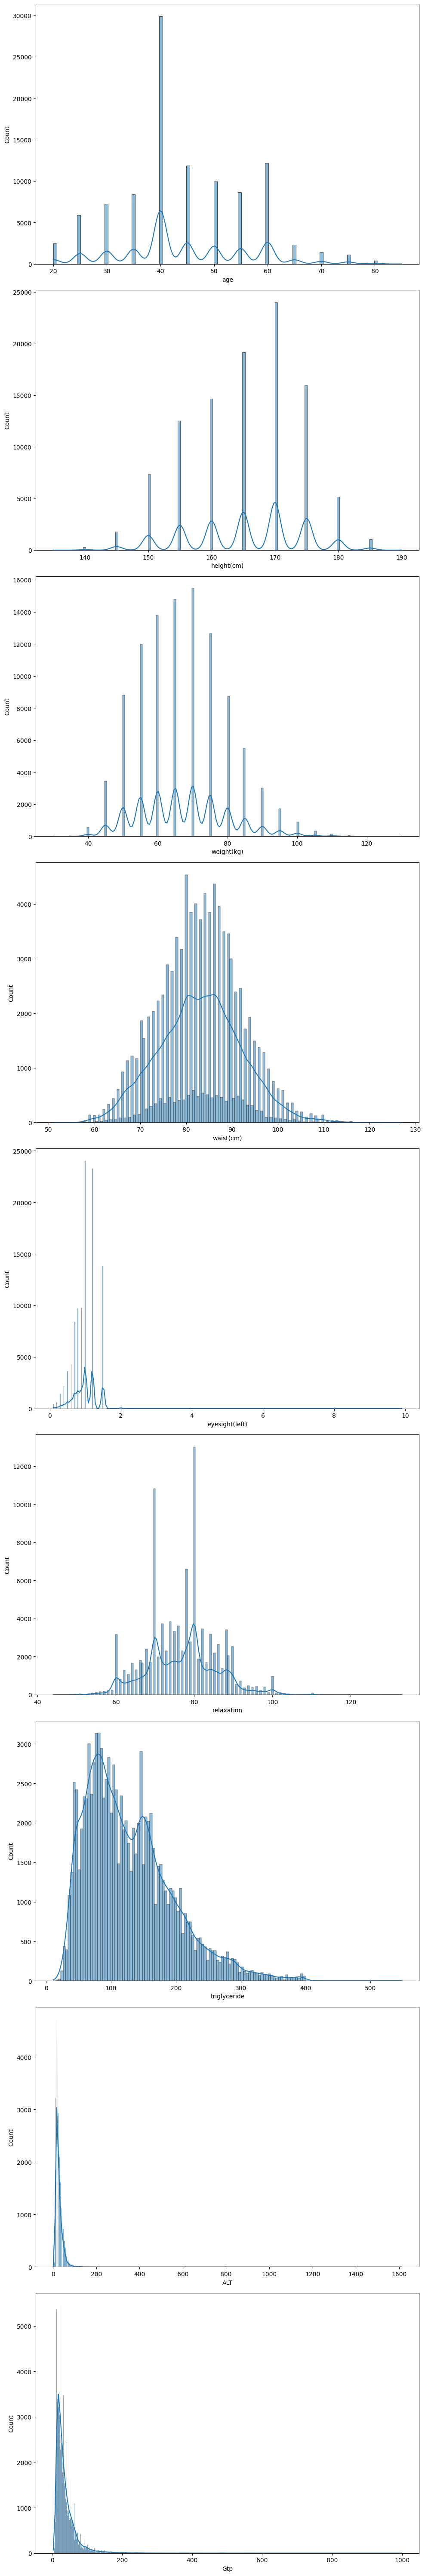

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt

continous_features = ['age','height(cm)','weight(kg)','waist(cm)','eyesight(left)','relaxation','triglyceride','ALT','Gtp']
fig, axes = plt.subplots(len(continous_features), 1, figsize=(10, 60))

for i, column in enumerate(continous_features):
    sns.histplot(data=df, x=column, kde=True, ax=axes[i])
plt.tight_layout()
plt.show()


<Axes: xlabel='hearing(left)', ylabel='count'>

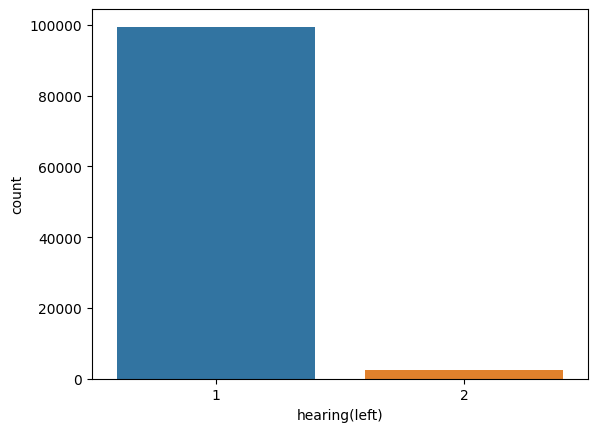

In [29]:
#plot data for categorical features

#categ_feature=['hearing(left)']
sns.countplot(x='hearing(left)',data=df)

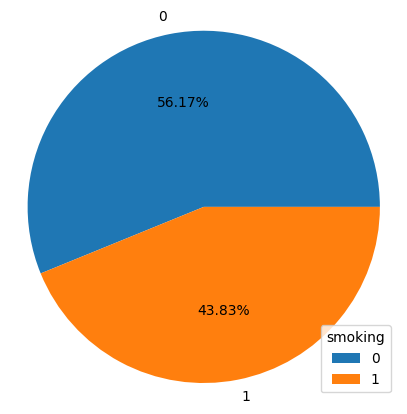

In [30]:
fig, ax=plt.subplots(1,1,figsize=(5,5))
def plot_pie(column):
    ax.pie(column.value_counts(),autopct='%1.2f%%',labels=column.value_counts().index)
    ax.legend(column.value_counts().index).set_title(column.name)
    ax.axis('equal')

plot_pie(df['smoking'])

In [31]:
#constract correlation matrix for continous features
corr=df[continous_features].corr()
corr.style.background_gradient(cmap='coolwarm')


,age,height(cm),weight(kg),waist(cm),eyesight(left),relaxation,triglyceride,ALT,Gtp
age,1.000000,-0.488268,-0.335632,-0.041462,-0.264507,0.066263,-0.039125,-0.143002,-0.048735
height(cm),-0.488268,1.000000,0.686052,0.406893,0.205653,0.116223,0.252591,0.238198,0.221239
weight(kg),-0.335632,0.686052,1.000000,0.829606,0.148134,0.267314,0.382203,0.403083,0.292970
waist(cm),-0.041462,0.406893,0.829606,1.000000,0.045068,0.293104,0.390743,0.383039,0.293473
eyesight(left),-0.264507,0.205653,0.148134,0.045068,1.000000,0.009075,0.058236,0.068861,0.040281
relaxation,0.066263,0.116223,0.267314,0.293104,0.009075,1.000000,0.194455,0.142780,0.190365
triglyceride,-0.039125,0.252591,0.382203,0.390743,0.058236,0.194455,1.000000,0.237364,0.301227
ALT,-0.143002,0.238198,0.403083,0.383039,0.068861,0.142780,0.237364,1.000000,0.394618
Gtp,-0.048735,0.221239,0.292970,0.293473,0.040281,0.190365,0.301227,0.394618,1.000000


<Axes: xlabel='smoking'>

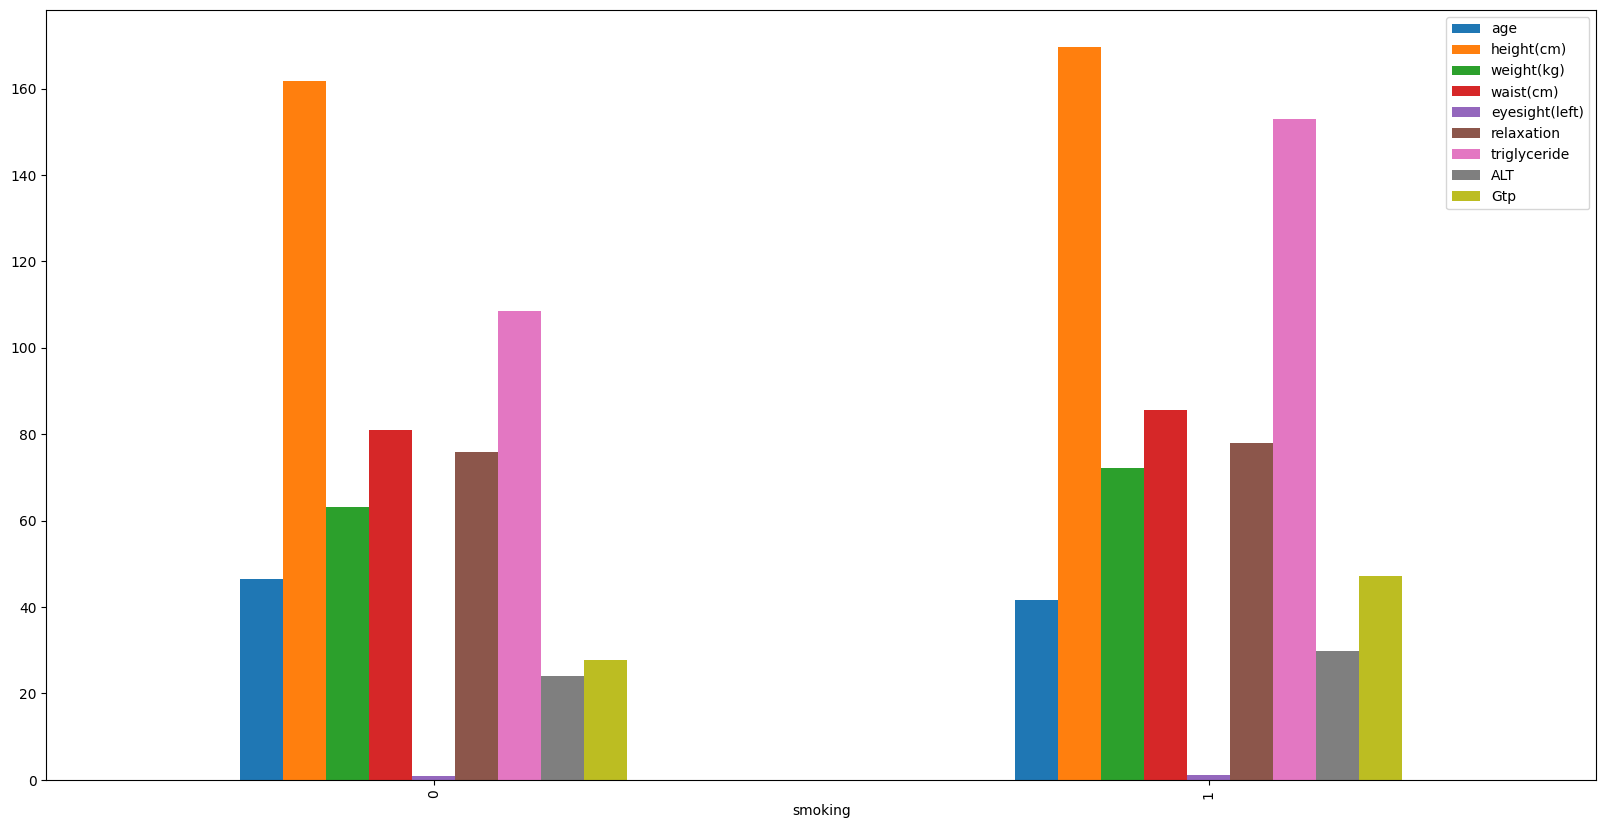

In [32]:
df.groupby(by="smoking").agg('mean')[['age','height(cm)','weight(kg)','waist(cm)','eyesight(left)','relaxation','triglyceride','ALT','Gtp']].plot(kind='bar',figsize=(20,10))

In [33]:
df.groupby(by="smoking").agg('mean')[['age','height(cm)','weight(kg)','waist(cm)','eyesight(left)','relaxation','triglyceride','ALT','Gtp']]

,age,height(cm),weight(kg),waist(cm),eyesight(left),relaxation,triglyceride,ALT,Gtp
smoking,,,,,,,,,
0,46.482750,161.773962,63.258249,80.952956,0.970709,75.969885,108.589149,23.983405,27.806645
1,41.554436,169.737107,72.181977,85.677928,1.051898,78.025696,152.935872,29.862476,47.242434


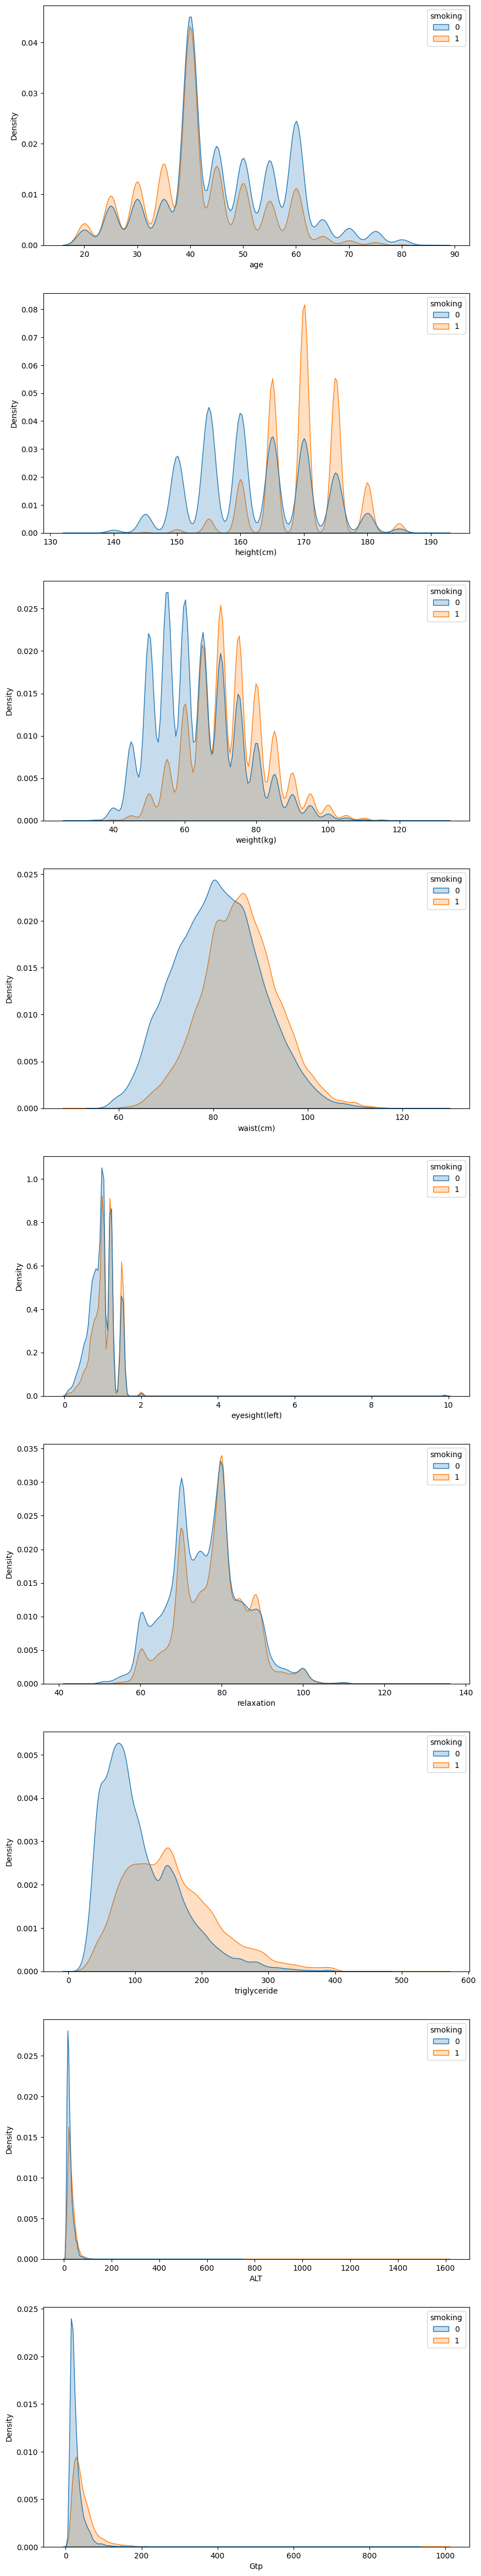

In [34]:
#plot KDE for continous features (KDE: Kernel Density Estimation, it is used for visualizing the Probability Density of a continuous variable)
fig, axes = plt.subplots(len(continous_features), 1, figsize=(10, 60))
for i, column in enumerate(continous_features):
    sns.kdeplot(data=df, x=column,hue='smoking',fill=True, ax=axes[i])

<Axes: xlabel='hearing(left)', ylabel='count'>

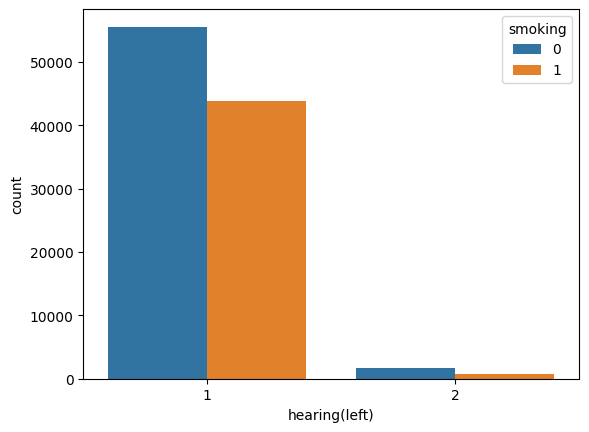

In [36]:

sns.countplot(x='hearing(left)',hue='smoking',data=df)


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


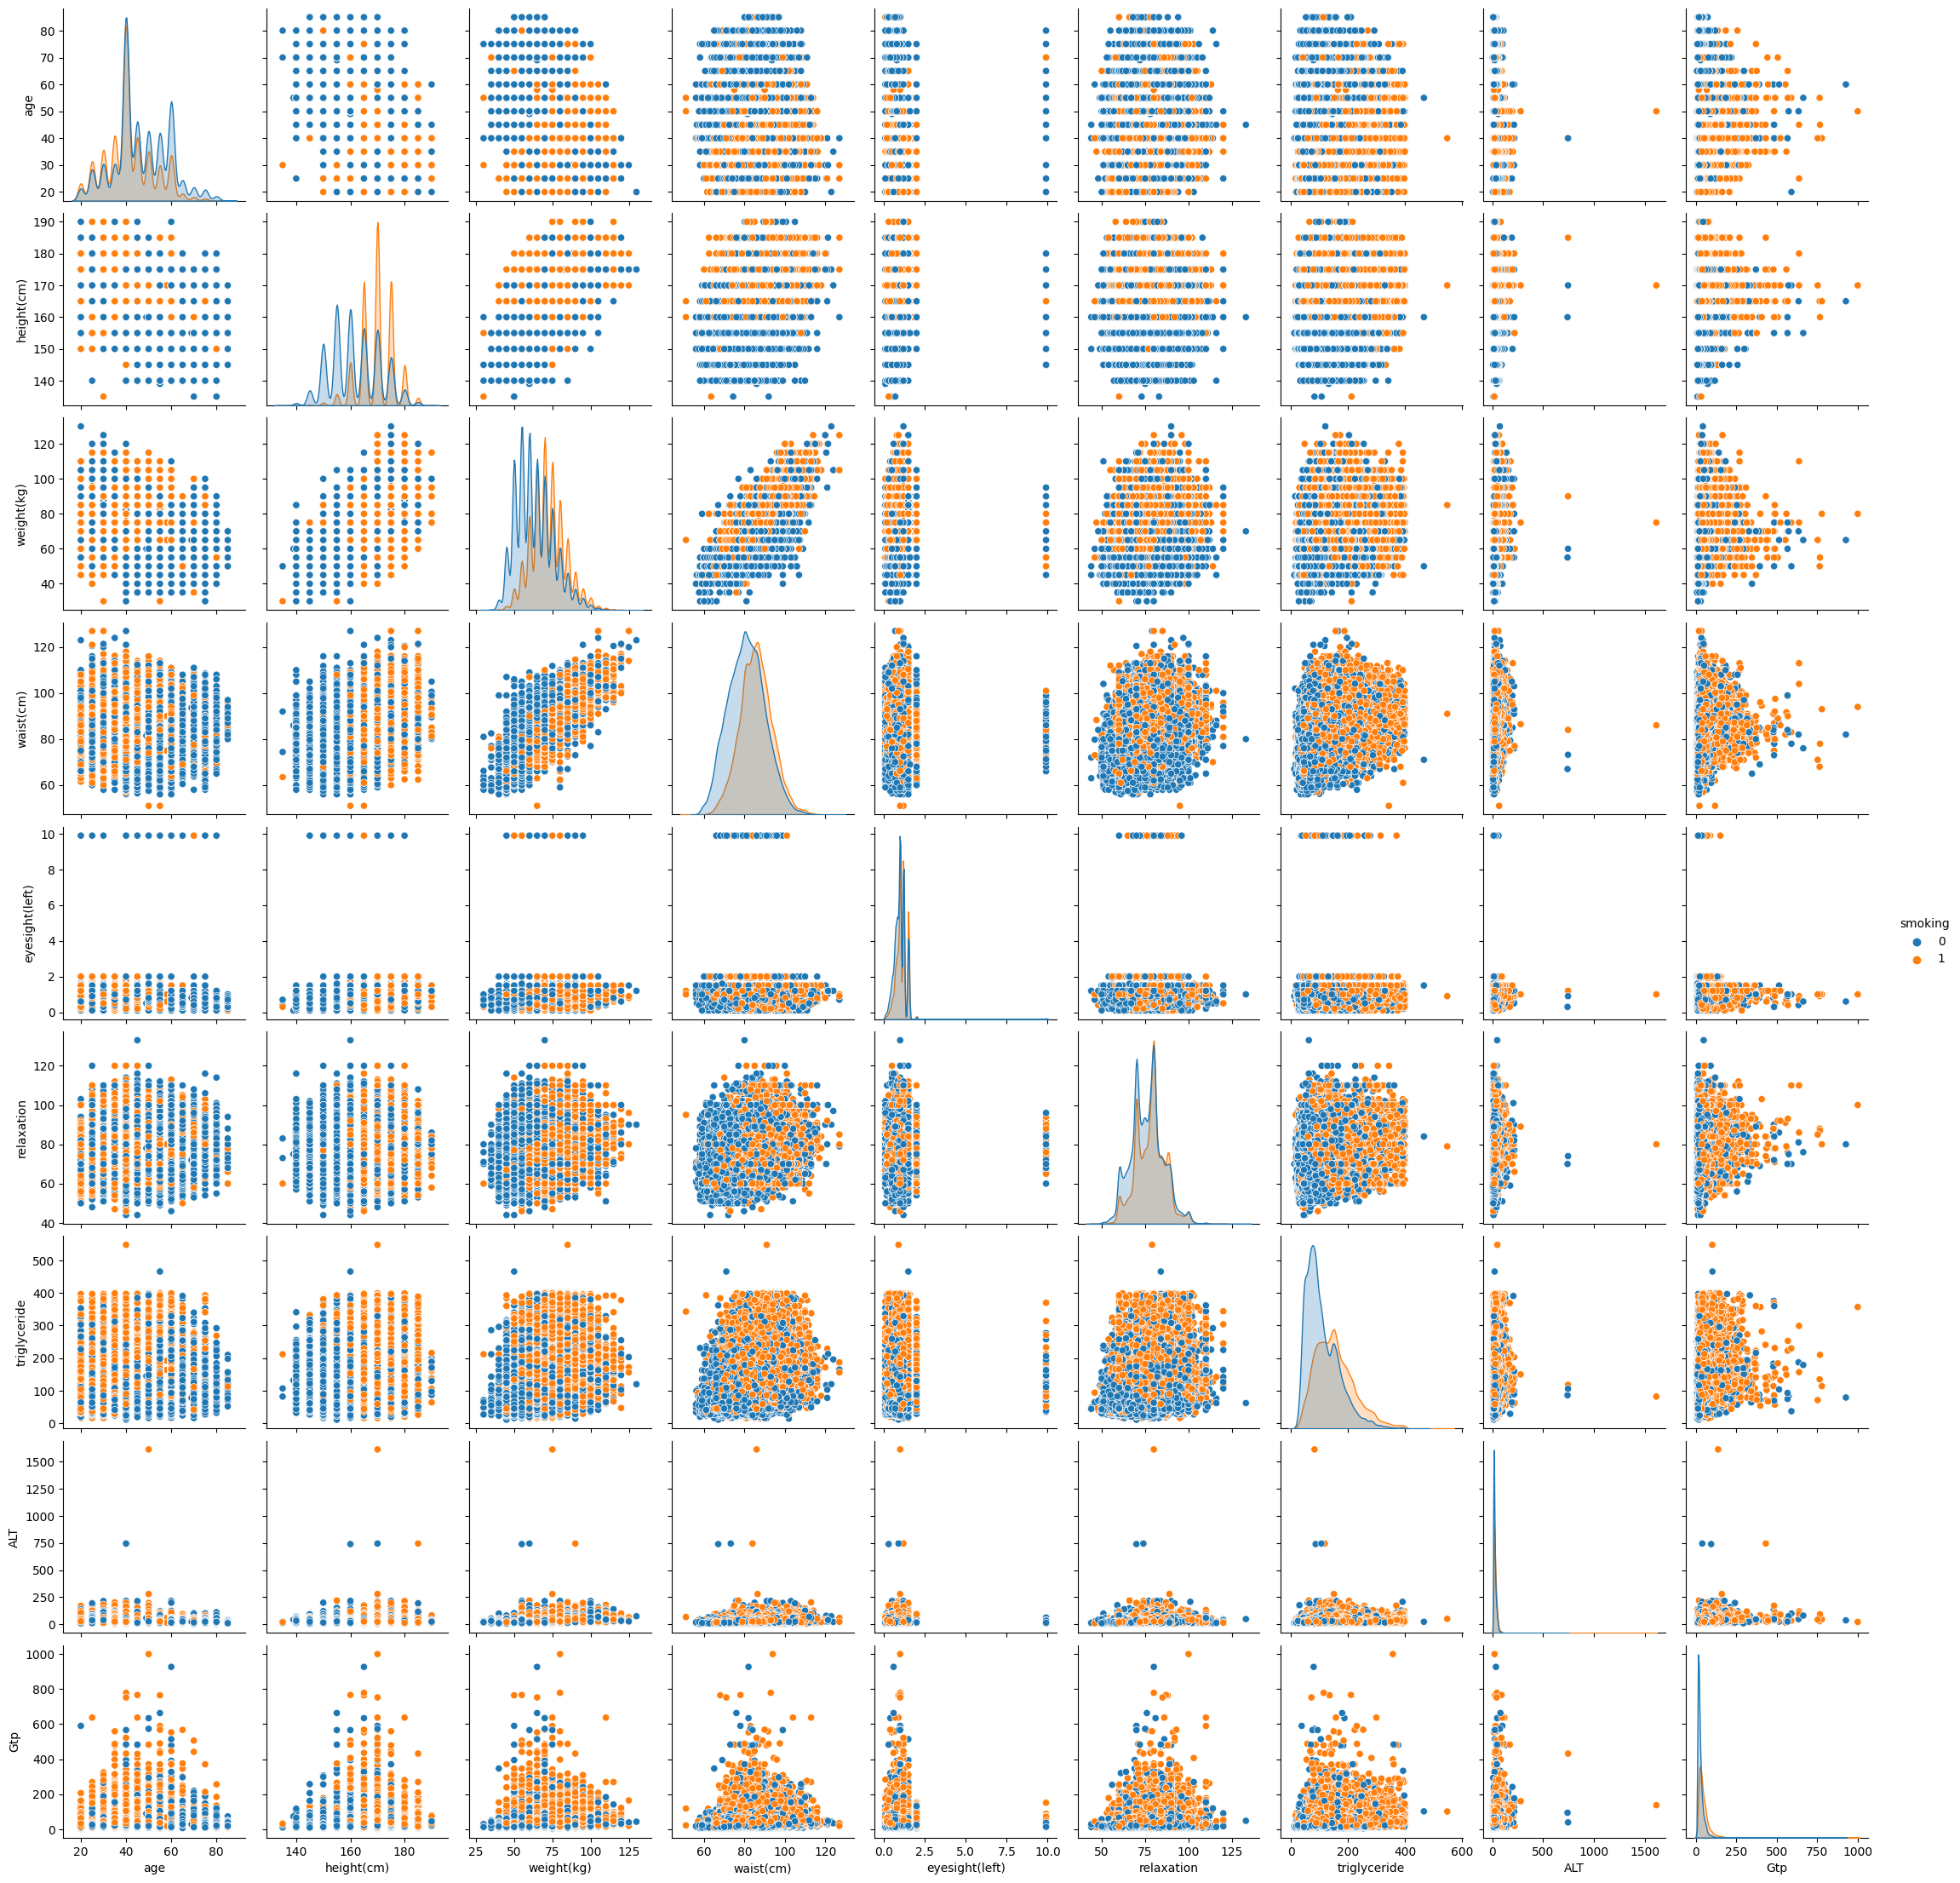

In [37]:
#plot the multivalued analysis for continous features
sns.pairplot(data=df[['age','height(cm)','weight(kg)','waist(cm)','eyesight(left)','relaxation','triglyceride','ALT','Gtp','smoking']],hue='smoking')